In [1]:
%matplotlib inline

In [2]:
import requests
from pandas.io.json import json_normalize
import pandas as pd
import numpy as np

In [3]:
sensorId = 4727
r = requests.get('http://api.gios.gov.pl/pjp-api/rest/data/getData/' + str(sensorId))

In [4]:
concentration = json_normalize(r.json())
concentrationFrame = pd.DataFrame()
concentrationFrame["dates"] = [d[u'date'] for d in concentration["values"].values.item()]
concentrationFrame["values"] = [d[u'value'] for d in concentration["values"].values.item()]
concentrationFrame = concentrationFrame.iloc[::-1]
rng = pd.date_range(start = concentrationFrame["dates"][:1].item(), periods=len(concentrationFrame), freq='H')
concentrationFrame["dates"] = rng
concentrationFrame = concentrationFrame[:-1]  #removing last line
firstDatetime = concentrationFrame["dates"].iloc[0]
concentrationFrame["relativeTime"] = (concentrationFrame["dates"] - firstDatetime) / np.timedelta64(1, 'h')

In [5]:
concentrationFrame

,dates,values,relativeTime
60,2017-04-21 01:00:00,19.14730,0.0
59,2017-04-21 02:00:00,1.65206,1.0
58,2017-04-21 03:00:00,12.53800,2.0
57,2017-04-21 04:00:00,1.00000,3.0
56,2017-04-21 05:00:00,20.45770,4.0
55,2017-04-21 06:00:00,22.90880,5.0
54,2017-04-21 07:00:00,13.48710,6.0
53,2017-04-21 08:00:00,32.13200,7.0
52,2017-04-21 09:00:00,17.73870,8.0
51,2017-04-21 10:00:00,12.90010,9.0


In [6]:
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(concentrationFrame["relativeTime"].values.reshape((concentrationFrame.shape[0],1)), concentrationFrame["values"].values,
                                                    train_size=0.75, test_size=0.25)

tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_concentration_pipeline.py')

Version 0.7.1 of tpot is outdated. Version 0.7.2 was released 2 days ago.


Optimization Progress:  33%|███▎      | 100/300 [02:35<02:49,  1.18pipeline/s]

Generation 1 - Current best internal CV score: 59.2572857379


Optimization Progress:  50%|█████     | 150/300 [03:49<03:28,  1.39s/pipeline]

Generation 2 - Current best internal CV score: 59.2178981236


Optimization Progress:  67%|██████▋   | 200/300 [05:49<01:54,  1.14s/pipeline]

Generation 3 - Current best internal CV score: 59.2178981236


Optimization Progress:  83%|████████▎ | 250/300 [08:42<01:29,  1.78s/pipeline]

Generation 4 - Current best internal CV score: 56.3100117396


Generation 5 - Current best internal CV score: 56.3100117396

Best pipeline: RandomForestRegressor(RBFSampler(input_matrix, RBFSampler__gamma=0.75), RandomForestRegressor__bootstrap=DEFAULT, RandomForestRegressor__max_features=0.05, RandomForestRegressor__min_samples_leaf=DEFAULT, RandomForestRegressor__min_samples_split=3, RandomForestRegressor__n_estimators=100)
82.4052705079


In [7]:
ftr = pd.date_range(start = concentrationFrame["dates"][-1:].item(), periods=25, freq='H', closed='right')
predctionFrame = pd.DataFrame( {"dates" : ftr})
predctionFrame["relativeTime"] = (predctionFrame["dates"] - firstDatetime) / np.timedelta64(1, 'h')
predctionFrame["predictedValues"] = predctionFrame["relativeTime"].apply(lambda x: tpot.predict(x).item())
wholeFrame = pd.concat([concentrationFrame, predctionFrame])
wholeFrame.set_index(["dates"], inplace=True)

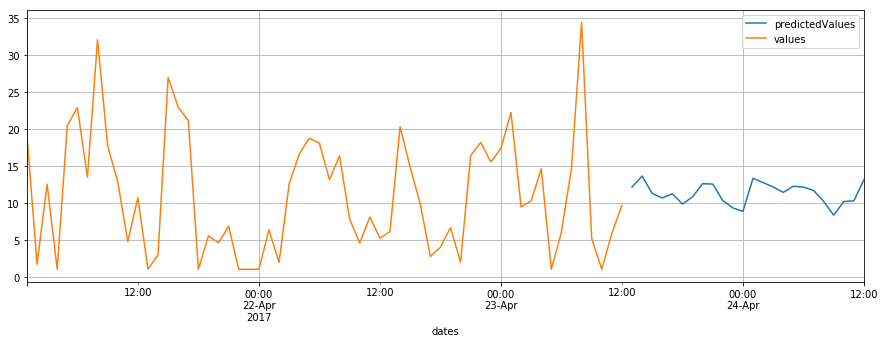

In [8]:
wholeFrame[["predictedValues", "values"]].plot(figsize=(15,5), grid=True)